<a href="https://colab.research.google.com/github/kameshcodes/deep-learning-codes/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## $\textbf{1. Load Libraries and Data}$

In [1]:
import numpy as np
import pandas as pd

In [2]:
def load_data_from(data_path):
  return pd.read_csv(data_path)

In [3]:
train_data_path = "/content/sample_data/california_housing_train.csv"
test_data_path = "/content/sample_data/california_housing_test.csv"

In [4]:
train = load_data_from(train_data_path)
test = load_data_from(test_data_path)

print('Train', train.shape)
print('Test', test.shape)

Train (17000, 9)
Test (3000, 9)


In [5]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [6]:
test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


## $\textbf{2. Make Regression Function}$

In [7]:
from scipy import stats


def add_intercept_feature_one(X):
  X['One'] = 1
  return X


def fit(X, y, intercept = True):
  if intercept:
        X = add_intercept_feature_one(X)

  X = np.array(X)
  y= np.array(y)

  XTX= np.dot(X.T,X)
  XTX_inv = np.linalg.inv(XTX)
  XTy = np.dot(X.T, y)
  betas = np.dot(XTX_inv, XTy)
  return betas


def predict(X, betas):
  return np.dot(X, betas)


def mean_square_error(y, y_pred):
  y = np.array(y)
  return np.mean((y-y_pred)**2)


def calculate_p_values(X, y, betas):
    n = X.shape[0]
    k = X.shape[1]

    y_pred = np.dot(X, betas)
    residuals = y - y_pred

    residual_variance = np.sum(residuals**2) / (n - k)
    XTX_inv = np.linalg.inv(np.dot(X.T, X))

    standard_errors = np.sqrt(np.diagonal(residual_variance * XTX_inv))


    t_stats = betas / standard_errors
    p_values = [2 * (1 - stats.t.cdf(np.abs(t), df=n - k)) for t in t_stats]

    p_val = pd.DataFrame({
    'Feature': X.columns,
    'coefficient': betas,
    'p-values': p_values
    })
    return p_val, residuals

In [8]:
X = train.drop(['median_house_value'], axis = 1)
y = train['median_house_value']

In [9]:
betas = fit(X,y)

print('betas:', betas)

betas: [-4.31396373e+04 -4.29256731e+04  1.15069493e+03 -8.37825121e+00
  1.17648543e+02 -3.84887721e+01  4.54360026e+01  4.05070684e+04
 -3.62060089e+06]


## $\textbf{3. Sklearn Regression}$

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, y)

LinearRegression()

### Model Coefficients Comparison

In [11]:
print('Our betas: ', betas)

Our betas:  [-4.31396373e+04 -4.29256731e+04  1.15069493e+03 -8.37825121e+00
  1.17648543e+02 -3.84887721e+01  4.54360026e+01  4.05070684e+04
 -3.62060089e+06]


In [12]:
sklearn_betas = np.hstack((model.coef_[:-1],model.intercept_))
print('Sklearn betas: ', sklearn_betas)

Sklearn betas:  [-4.31396373e+04 -4.29256731e+04  1.15069493e+03 -8.37825121e+00
  1.17648543e+02 -3.84887721e+01  4.54360026e+01  4.05070684e+04
 -3.62060089e+06]


In [13]:
sklearn_betas = np.hstack((model.coef_[:-1],model.intercept_))

print("\nAvg Mean Squared Diff between our betas and Sklearn Implementation betas:",
      mean_square_error(betas, sklearn_betas))


Avg Mean Squared Diff between our betas and Sklearn Implementation betas: 1.7687750181785079e-09


In [14]:
p_val, residuals = calculate_p_values(X, y, betas)
p_val

,Feature,coefficient,p-values
0,longitude,-4.313964e+04,0.000000e+00
1,latitude,-4.292567e+04,0.000000e+00
2,housing_median_age,1.150695e+03,0.000000e+00
3,total_rooms,-8.378251e+00,0.000000e+00
4,total_bedrooms,1.176485e+02,0.000000e+00
5,population,-3.848877e+01,0.000000e+00
6,households,4.543600e+01,7.542109e-08
7,median_income,4.050707e+04,0.000000e+00
8,One,-3.620601e+06,0.000000e+00


### Training MSE

In [15]:
y_pr = model.predict(X)

print('Sklearn Predictions on Training Data: ', np.hstack((model.coef_[:-1],model.intercept_)))


mse_sk = mean_square_error(y, y_pr)

print("\nTraining MSE from Sklearn Implementation: ", mse_sk)

Sklearn Predictions on Training Data:  [-4.31396373e+04 -4.29256731e+04  1.15069493e+03 -8.37825121e+00
  1.17648543e+02 -3.84887721e+01  4.54360026e+01  4.05070684e+04
 -3.62060089e+06]

Training MSE from Sklearn Implementation:  4824523173.926901


In [16]:
y_pred = predict(X, betas)
print('Predictions on Training Data From Our Implementation: ', y_pred)

mse = mean_square_error(y, y_pred)
print("\n\nTraining MSE from our Implementation:", mse)

Predictions on Training Data From Our Implementation:  [  7128.08452839  73675.60144447 -31317.28530815 ... 100878.32872725
  63733.22144752 186850.92450231]


Training MSE from our Implementation: 4824523173.926897


# Residual Vs. Fitted Plot

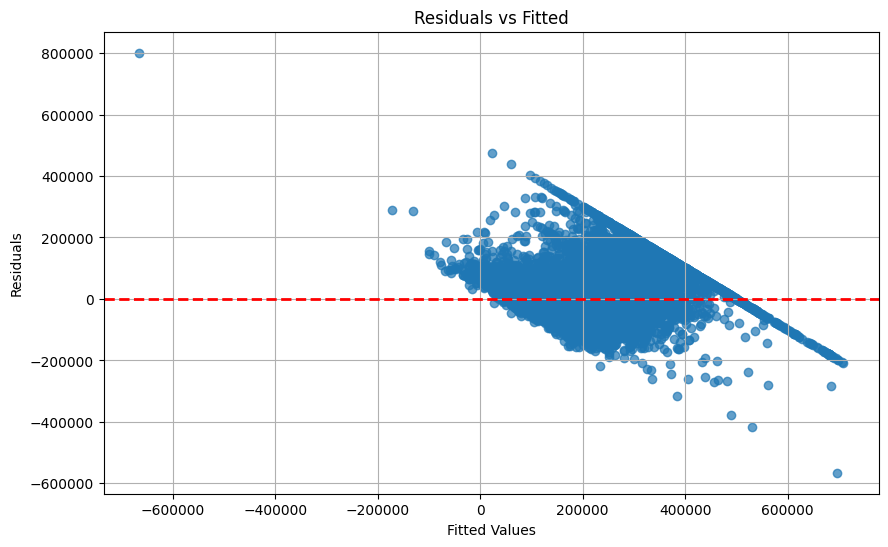

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

# Not a good fit on this data !